In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True)
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython import display

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
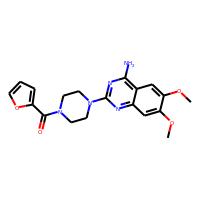
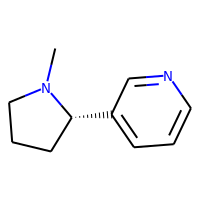
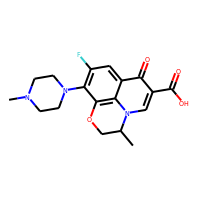
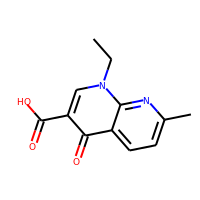
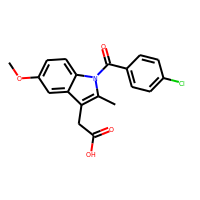

In [2]:
#Load the sdf from approved drugs download on chembl
df_meds = PandasTools.LoadSDF('./data/meds.sdf', isomericSmiles=True)
df_meds.head()

In [4]:
#First let's look what we have
print(len(df_meds))
df_meds['molecule_type'].value_counts()

3246


Small molecule     3149
Protein              76
Unknown              17
Oligonucleotide       2
Oligosaccharide       2
Name: molecule_type, dtype: int64

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
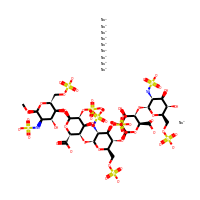
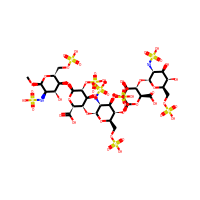

In [5]:
#Watch a category
df_meds[df_meds.molecule_type == 'Oligosaccharide'].head()

In [6]:
#On garde seulement une catégorie
df_meds = df_meds[df_meds['molecule_type'] == 'Small molecule']

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
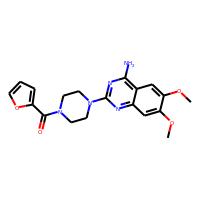
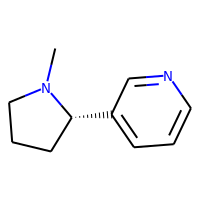
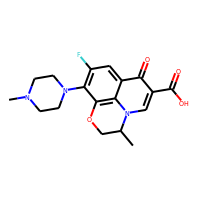
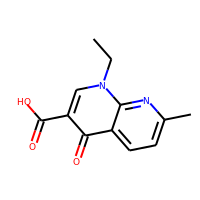
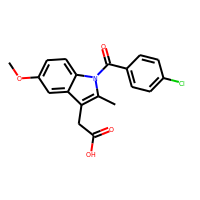

In [7]:
#On garde seulement les molécules seules
def number_frags(mol):
    return(len(Chem.rdmolops.GetMolFrags(mol)))

df_meds['Mixture'] = df_meds['ROMol'].apply(number_frags)
df_meds.head()

In [8]:
df_meds['Mixture'].value_counts()

1     2021
2      786
3      241
4       33
5       32
7       11
8        9
9        5
6        5
49       1
29       1
25       1
13       1
11       1
48       1
Name: Mixture, dtype: int64

In [9]:
df_meds = df_meds[df_meds['Mixture'] == 1]
len(df_meds)

2021

In [10]:
#On regarde les dates de sorties
df_meds['first_approval'].value_counts()

nan       511
1982.0    109
1996.0     47
1997.0     37
1999.0     35
1985.0     35
2015.0     32
1995.0     30
2014.0     30
2017.0     30
1992.0     29
1991.0     29
2001.0     27
1986.0     26
1984.0     26
1981.0     25
1959.0     25
1974.0     25
2009.0     25
2004.0     24
2011.0     24
2012.0     23
1960.0     23
1993.0     23
1998.0     23
2008.0     23
1990.0     22
1979.0     22
2000.0     22
2006.0     21
1987.0     21
2013.0     21
1994.0     20
1976.0     20
2003.0     20
1967.0     20
1978.0     19
2007.0     19
1964.0     19
1973.0     19
1989.0     19
2002.0     18
2010.0     18
1957.0     18
1983.0     17
1977.0     17
1961.0     16
1953.0     16
1988.0     16
2016.0     15
1950.0     15
1965.0     15
1962.0     14
2005.0     14
1971.0     14
1955.0     14
1975.0     13
1980.0     13
1972.0     12
1956.0     12
1969.0     12
1970.0     12
1951.0     11
1958.0     10
1954.0     10
1952.0      9
1963.0      9
1946.0      8
1968.0      8
1966.0      7
1949.0      7
1948.0

In [11]:
df_meds.dropna(subset=['first_approval'], inplace=True)
df_meds['first_approval'] = df_meds['first_approval'].astype(float)
len(df_meds)

2021

In [12]:
len(df_meds[df_meds['first_approval'] >= 2000])

409

In [13]:
df_meds[df_meds['first_approval'] >= 2000]['natural_product'].value_counts()

0    314
1     95
Name: natural_product, dtype: int64

In [14]:
df_meds = df_meds[df_meds['first_approval'] >= 2000]

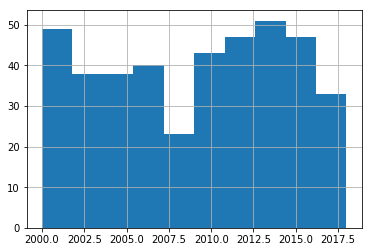

In [15]:
%matplotlib inline

#On peut regarder sous forme d'histogramme
df_meds['first_approval'].hist()


In [84]:
#On prépare ce qu'on a besoin pour l'ACP 
df_PCA = df_meds[['ID', 'natural_product', 'ROMol']]

### Calculating our descriptors 

In [85]:
#RDKIT Descriptors 
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski

#### Liste des descripteurs : 
#### ['FCSP3', 'HBA', 'HBD', 'LabuteASA', 'LogP', 'MQN10', 'MQN8', 'MW', 'NAR', 'NRB', 'TPSA']

In [86]:
df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['LabuteASA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['MQN8'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

ID natural_product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
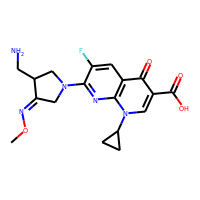
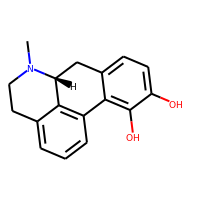
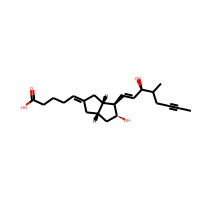
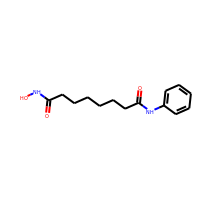
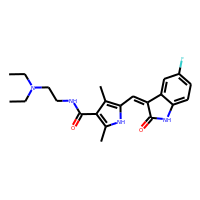

In [87]:
df_PCA.head()

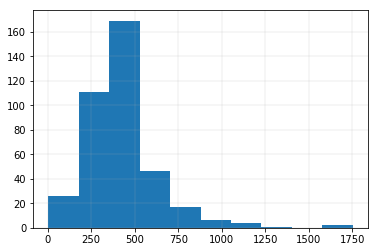

In [88]:
#Distribution des MWs
from IPython import display
%matplotlib inline
df_PCA.MW.hist()

In [89]:
#Pas au dessus de 700 et en dessous de 200 
df_PCA = df_PCA[df_PCA['MW'].between(200, 700)]
len(df_PCA)

316

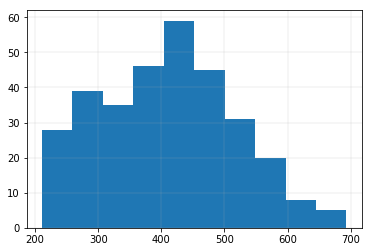

In [90]:
df_PCA.MW.hist()

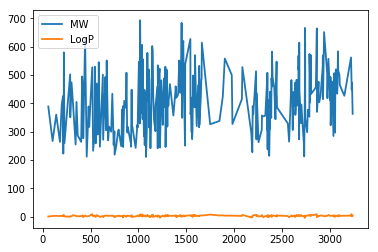

In [91]:
#On peut regarder la projection des molécules selon différentes variables 
df_PCA[['MW', 'LogP']].plot()

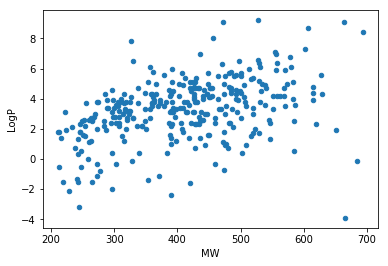

In [92]:
df_PCA.plot(x='MW', y='LogP', kind='scatter')

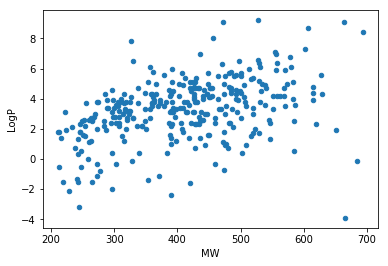

In [93]:
df_PCA.plot.scatter(x='MW', y='LogP')

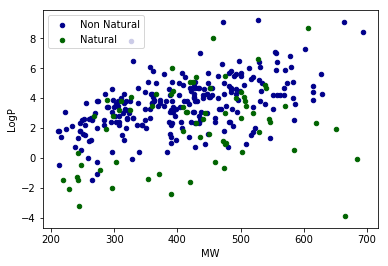

In [94]:
ax = df_PCA[df_PCA['natural_product'] == '0'].plot.scatter(x='MW', y='LogP', color='DarkBlue', label='Non Natural')
df_PCA[df_PCA['natural_product'] == '1'].plot.scatter(x='MW', y='LogP', color='DarkGreen', label='Natural', ax=ax)





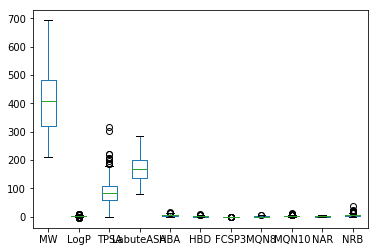

In [27]:
#on peut regarder les valeurs des différents descripteurs 
df_PCA.plot.box()

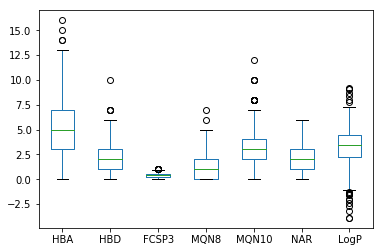

In [28]:
#Sans prendre en compte les valeurs trop grandes
x = list(range(7,13))
x.append(4)

df_PCA.iloc[:, x].plot.box()

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


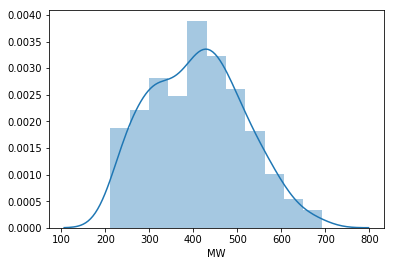

In [29]:
#La librairie seaborn peut-être plus adaptée pour les graphiques 
import seaborn as sns
import matplotlib.pyplot as plt #couplée avec

sns.distplot(df_PCA.MW, )

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


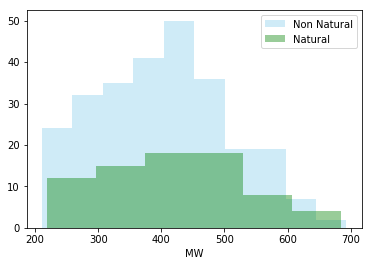

In [30]:
#On peut regarder la distribution sur le même graphique selon la catégorie
sns.distplot(df_PCA[df_PCA['natural_product'] == '0']['MW'] , color="skyblue", label="Non Natural", kde=False)
sns.distplot(df_PCA[df_PCA['natural_product'] == '1']['MW'] , color="green", label="Natural", kde=False)
plt.legend()

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


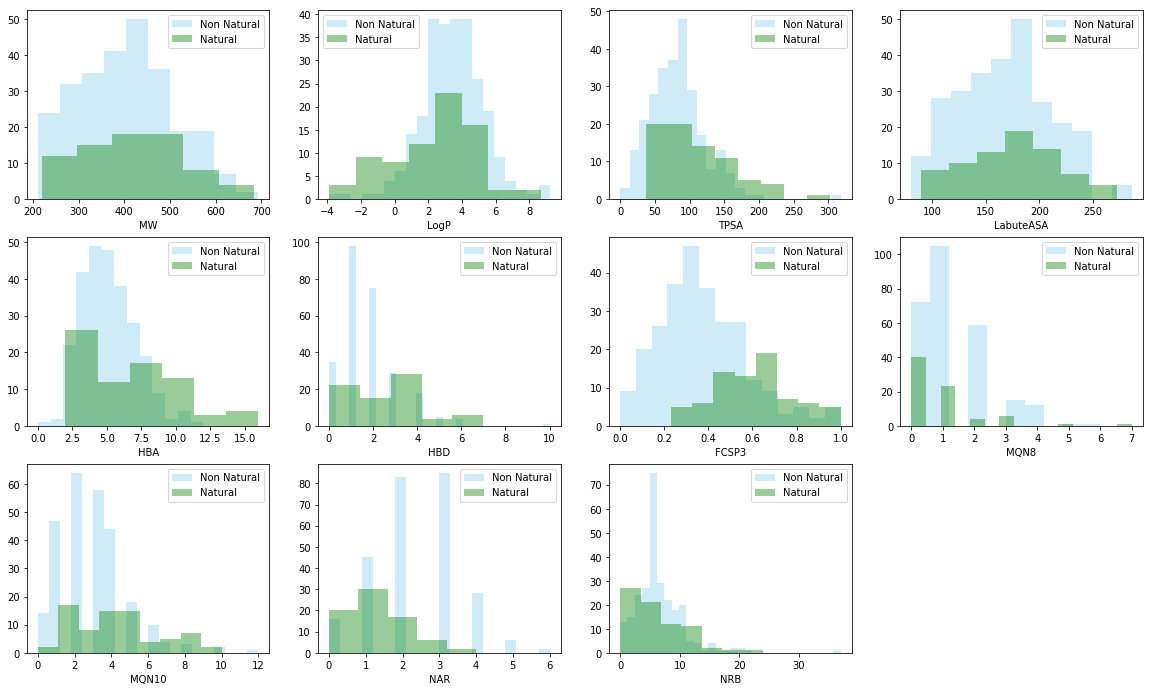

In [31]:
#Pour regarder tous les descripteurs :

plt.figure(figsize=(20, 16))

j=1
for i in df_PCA.iloc[:, 3:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '0'][i] , color="skyblue", label="Non Natural", kde=False)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '1'][i] , color="green", label="Natural", kde=False)
    plt.legend()
    j += 1


In [32]:
#Matrice de corrélation
df_PCA.corr()

MW      LogP      TPSA  LabuteASA       HBA       HBD     FCSP3      MQN8     MQN10       NAR       NRB
MW         1.000000  0.387608  0.443746   0.980462  0.567000  0.172069 -0.014839  0.191459  0.414116  0.406872  0.497715
LogP       0.387608  1.000000 -0.512357   0.447269 -0.325578 -0.505388 -0.095021 -0.253564 -0.314524  0.325596  0.188083
TPSA       0.443746 -0.512357  1.000000   0.377369  0.792766  0.719552 -0.042564  0.521434  0.727753  0.103887  0.308490
LabuteASA  0.980462  0.447269  0.377369   1.000000  0.516468  0.132195 -0.003409  0.175927  0.359898  0.416468  0.505491
HBA        0.567000 -0.325578  0.792766   0.516468  1.000000  0.358540 -0.024884  0.302333  0.584236  0.255839  0.338959
HBD        0.172069 -0.505388  0.719552   0.132195  0.358540  1.000000  0.025591  0.516755  0.449937 -0.056697  0.192072
FCSP3     -0.014839 -0.095021 -0.042564  -0.003409 -0.024884  0.025591  1.000000 -0.228676  0.215128 -0.745814  0.232646
MQN8       0.191459 -0.253564  0.521434   0.175927  0.302333  0.516755 -0.228676  1.000000  0.117998  0.136342  0.188356
MQN10      0.414116 -0.314524  0.727753   0.359898  0.584236  0.449937  0.215128  0.117998  1.000000 -0.204175  0.508687
NAR        0.406872  0.325596  0.103887   0.416468  0.255839 -0.056697 -0.745814  0.136342 -0.204175  1.000000  0.001472
NRB        0.497715  0.188083  0.308490   0.505491  0.338959  0.192072  0.232646  0.188356  0.508687  0.001472  1.000000

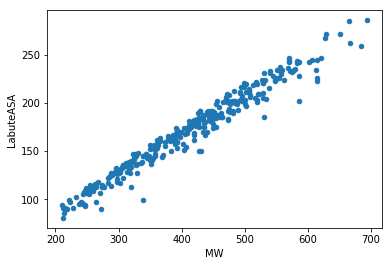

In [33]:
df_PCA.plot.scatter(x='MW', y='LabuteASA')

### Start ACP 

pip install prince=='0.2.6'

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_p

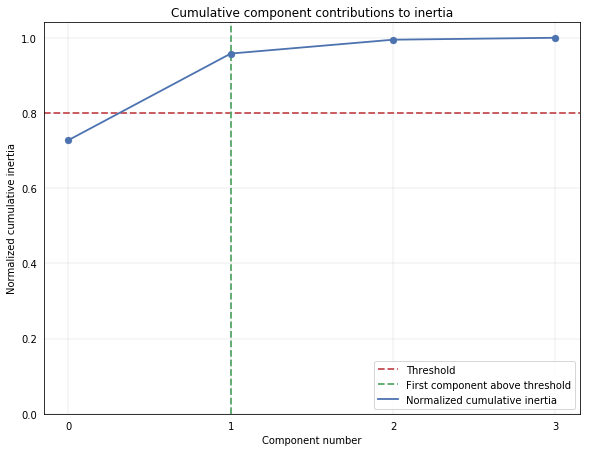

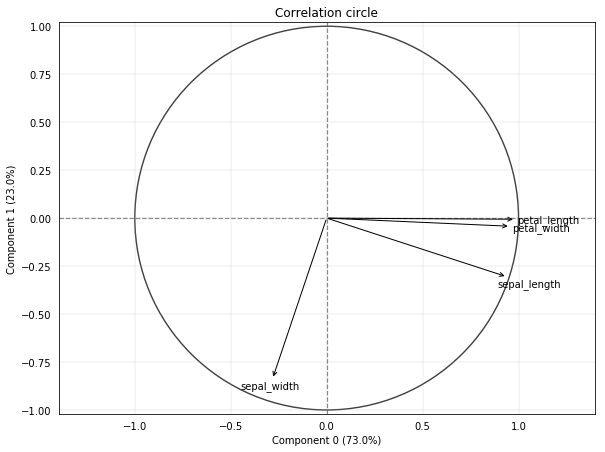

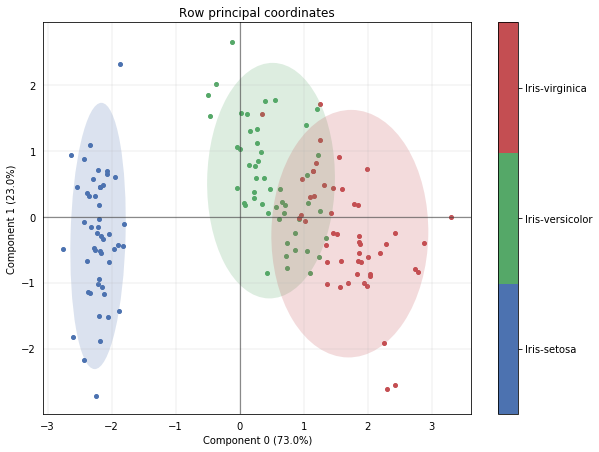

In [39]:
#utilisation de Prince par un exemple classique 

import matplotlib.pyplot as plt
import prince


df = pd.read_csv('https://raw.githubusercontent.com/kormilitzin/Prince/master/examples/data/iris.csv')
#on lit un datasetr tout fait 

pca = prince.PCA(df, n_components=4)

fig1, ax1 = pca.plot_cumulative_inertia()
fig2, ax2 = pca.plot_correlation_circle()
fig3, ax3 = pca.plot_rows(axes=[0,1], color_by='class', ellipse_fill=True)

plt.show()

In [40]:
df_PCA2 = df_PCA.copy() #On prend une copie car Prince effectue des changements sur le DF
pca1 = prince.PCA(df_PCA2, n_components=4)
pca1?

In [41]:
pca1.X.head() #= valeurs standardisées des descripteurs (DF)

MW      LogP      TPSA  LabuteASA       HBA       HBD     FCSP3      MQN8     MQN10       NAR       NRB
57  -0.175902 -1.063767  0.791757  -0.253719  1.027740  0.021239  0.099814  0.742758  0.396162 -0.071702 -0.327528
102 -1.329355 -0.201596 -1.005627  -1.214627 -0.948683  0.021239 -0.591078 -0.986953 -0.594243 -0.071702 -1.487524
140 -0.449138  0.133693 -0.232729  -0.302816 -0.948683  0.677702  1.190767 -0.986953  0.396162 -1.696959  0.368469
179 -1.357718 -0.345291 -0.219130  -1.333864 -0.948683  0.677702  0.026862  0.742758 -0.099041 -0.884331  0.368469
198 -0.089865  0.037896 -0.246329   0.003459 -0.948683  0.677702 -0.271575  0.742758 -0.594243 -0.071702  0.136470

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


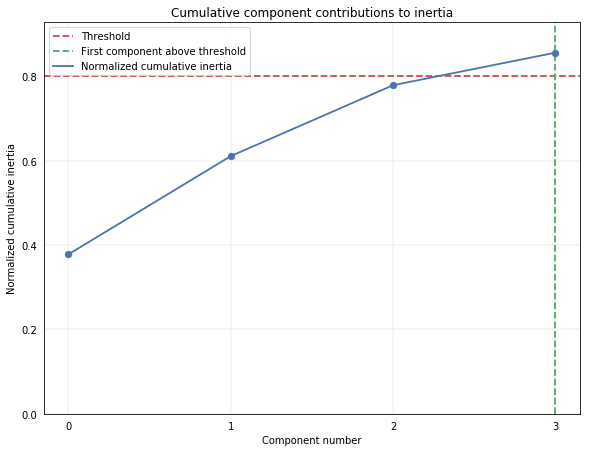

In [42]:
#Les fonctions pour représenter l'ACP sont incluses dans le package. 
fig1, ax1 = pca1.plot_cumulative_inertia()
plt.show()

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


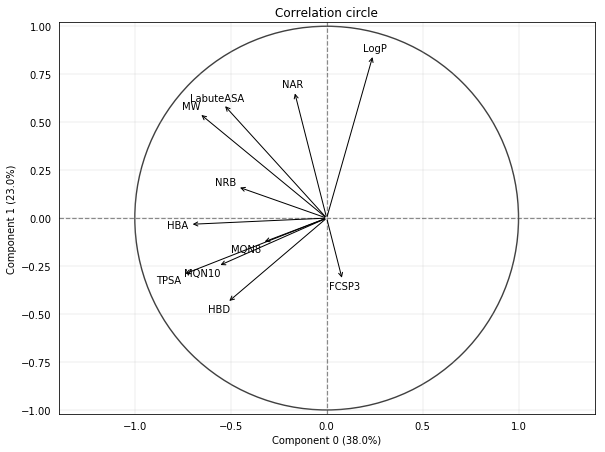

In [43]:
#Le cercle des corrélations
fig2, ax2 = pca1.plot_correlation_circle()
plt.show()

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


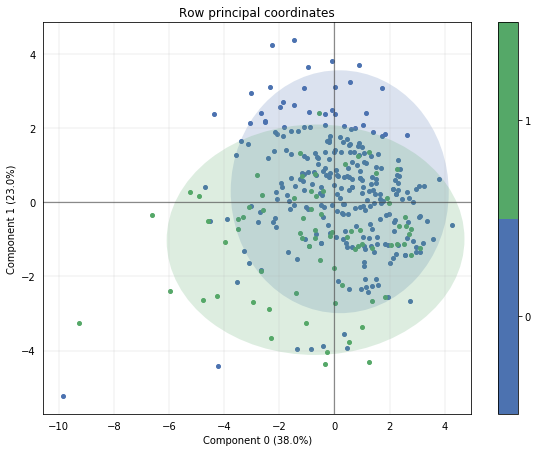

In [45]:
fig2, ax2 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
plt.show()

In [69]:
#Corrélation des variables :
pca1.column_correlations

0         1         2         3
MW         0.753680 -0.564937 -0.194303 -0.011785
LogP      -0.189957 -0.870256 -0.277674  0.212133
TPSA       0.888003  0.338934  0.191291 -0.112907
LabuteASA  0.710668 -0.611814 -0.215919  0.029466
HBA        0.830035  0.050996  0.083739 -0.375206
HBD        0.616093  0.490401  0.225392  0.282456
FCSP3     -0.009880  0.373025 -0.835158  0.093761
MQN8       0.500342  0.176390  0.452798  0.620404
MQN10      0.741119  0.300866 -0.317967 -0.251560
NAR        0.232809 -0.680718  0.610053 -0.144143
NRB        0.582812 -0.170250 -0.467112  0.303023

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


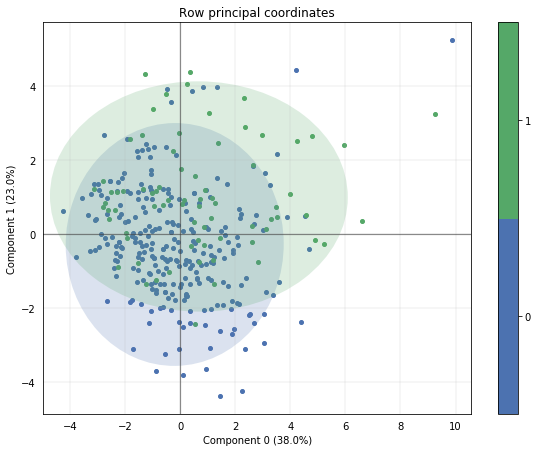

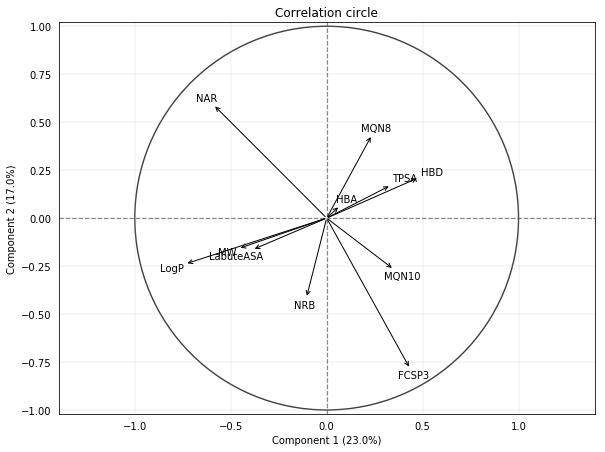

In [71]:
#On peut aussi représenter les autres composantes
fig1, ax1 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
fig2, ax2 =pca1.plot_correlation_circle(axes=[1,2])

plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


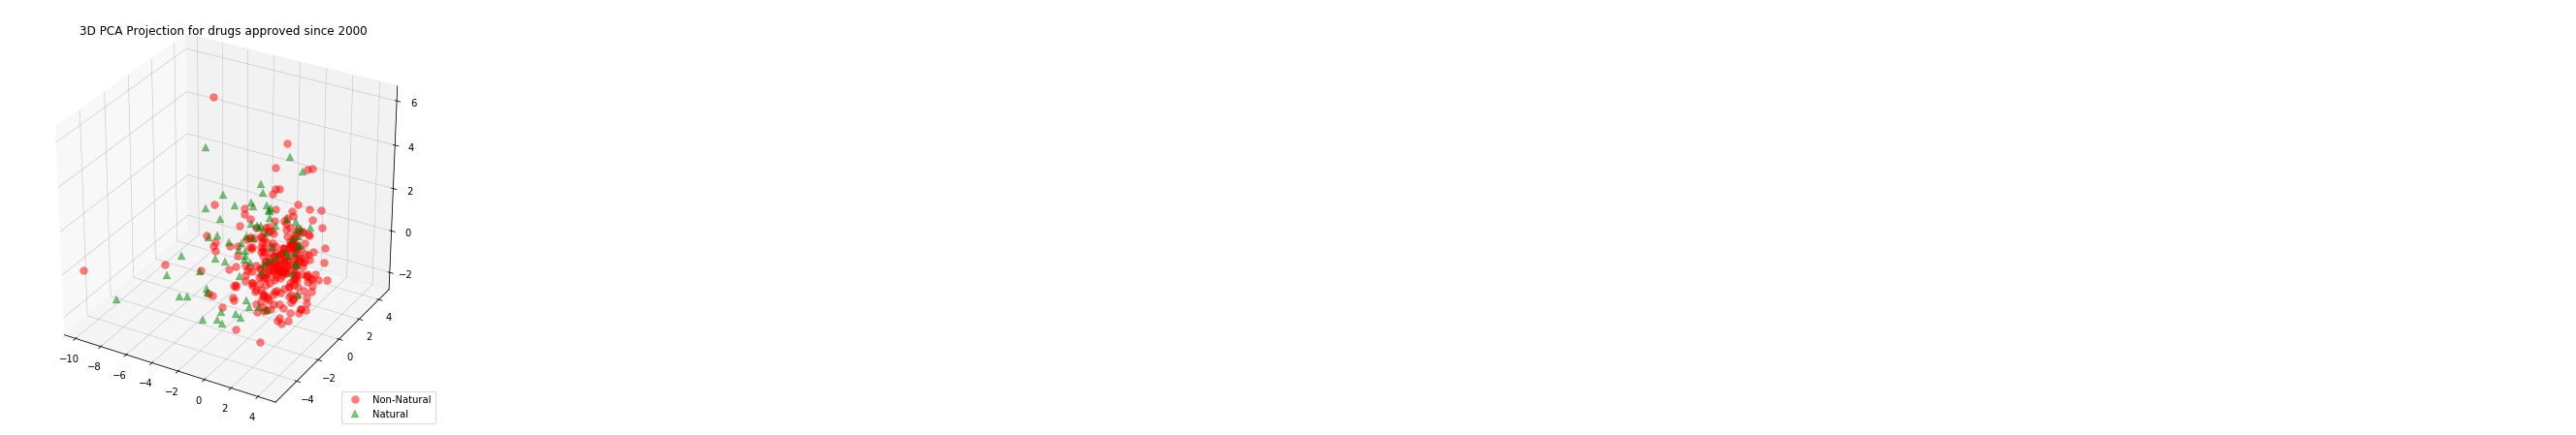

In [51]:
#Possible de représenter en 3D

#Besoin des indexes pour chaque catégorie
non_nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '0'].index
nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '1'].index


%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(pca1.row_principal_coordinates[0][non_nat], pca1.row_principal_coordinates[1][non_nat], pca1.row_principal_coordinates[2][non_nat], 'o', markersize=8, color='red', alpha=0.5, label='Non-Natural')
ax.plot(pca1.row_principal_coordinates[0][nat], pca1.row_principal_coordinates[1][nat], pca1.row_principal_coordinates[2][nat], '^', markersize=8, alpha=0.5, color='green', label='Natural')

plt.title('3D PCA Projection for drugs approved since 2000')
ax.legend(loc='lower right')

plt.show()

In [46]:
#Contribution de chaque valeur dans les composantes
pca1.row_component_contributions

0             1             2             3
57    6.254810e-04  1.625783e-03  6.392328e-04  7.319602e-04
102   4.799981e-03  4.678205e-04  1.236394e-03  1.209421e-03
140   4.086260e-04  1.817804e-03  5.956631e-03  5.281928e-04
179   7.977136e-04  3.384152e-03  8.483835e-05  5.955427e-03
198   7.525802e-05  3.890138e-06  3.961239e-04  6.108341e-03
212   1.978310e-04  2.795895e-03  5.286949e-04  2.701933e-03
214   6.911375e-03  2.062166e-03  4.320027e-04  1.223232e-03
219   7.000687e-05  6.294698e-04  8.455636e-05  8.490434e-04
220   3.896665e-03  1.115586e-02  1.721189e-03  2.609765e-04
226   8.632221e-04  1.805819e-03  4.061934e-03  2.692131e-05
230   7.827800e-04  5.038386e-03  3.818928e-04  2.806000e-04
286   5.841507e-04  1.623607e-03  8.905934e-04  1.787531e-06
287   1.004048e-04  6.843899e-04  2.895821e-03  2.947550e-03
300   5.121507e-03  7.939496e-05  7.764136e-03  1.986945e-02
308   2.446290e-04  1.212364e-03  9.558945e-04  2.697157e-03
314   3.365460e-05  1.764772e-05  2.794315e-02  8.559038e-03
315   1.261500e-03  1.585750e-03  9.575180e-06  2.449443e-04
336   4.947884e-03  1.084691e-03  1.491331e-07  1.803022e-03
339   1.101211e-03  1.025197e-04  1.661155e-03  3.892684e-03
343   5.779488e-03  1.357241e-09  4.638846e-04  1.732672e-03
352   6.248591e-05  1.104415e-04  3.582411e-05  3.185542e-04
365   4.510127e-03  1.440213e-03  1.282211e-04  1.876077e-03
395   5.206189e-03  8.268798e-04  4.890030e-04  1.088333e-05
401   2.356726e-03  1.432305e-03  1.259861e-04  3.760156e-03
411   2.107626e-03  5.120172e-05  6.454203e-04  3.619938e-03
415   6.453553e-05  3.034765e-03  2.882128e-05  4.205503e-05
417   1.280867e-03  1.787061e-03  2.421659e-04  1.533237e-03
418   8.288042e-04  1.155086e-03  3.579378e-04  1.264081e-03
423   6.117149e-07  8.520931e-03  3.563652e-03  2.328329e-03
442   8.069324e-03  3.115240e-03  1.048108e-03  6.408097e-03
459   3.166157e-03  2.586491e-03  6.117618e-03  4.190421e-04
479   1.237731e-03  2.673777e-04  1.447639e-03  4.581679e-03
481   1.265423e-02  2.255640e-02  1.603790e-03  8.485885e-04
485   1.660778e-03  1.031107e-03  8.691014e-04  1.887454e-03
517   5.562071e-04  1.580234e-02  1.093820e-03  8.376671e-03
526   6.233060e-03  2.054890e-03  1.066845e-04  5.840301e-04
543   4.270036e-04  4.643924e-04  4.703638e-03  8.107846e-03
544   1.258880e-03  4.257908e-03  1.716129e-05  1.840117e-04
550   6.507507e-04  6.287977e-03  2.445088e-03  3.195830e-03
553   1.738739e-03  5.768879e-03  1.805984e-03  1.043032e-03
565   6.843972e-07  6.541161e-03  1.168487e-06  4.442424e-04
574   4.933999e-03  8.770982e-05  2.079493e-04  3.295839e-04
577   1.533490e-03  5.712148e-05  5.607654e-03  7.736692e-04
582   2.793769e-04  1.672713e-03  4.979480e-04  2.324340e-03
585   4.779101e-03  5.533469e-05  7.317635e-03  9.003438e-03
597   1.318549e-03  8.145661e-03  8.890549e-04  2.174103e-03
628   8.743055e-03  2.306450e-04  3.517656e-03  1.322866e-02
631   1.299489e-04  1.721100e-02  4.362901e-04  5.445592e-03
649   5.726741e-07  2.108984e-03  2.707349e-05  1.628543e-04
654   1.611514e-03  4.995984e-03  5.851576e-04  1.893024e-03
655   5.452837e-04  4.802408e-03  2.592934e-03  6.807348e-04
658   8.292070e-04  1.377196e-03  4.959332e-04  5.898212e-03
663   1.295666e-03  5.950207e-04  9.403663e-04  2.478666e-03
668   6.940232e-03  2.872163e-03  1.485053e-04  5.563193e-03
683   2.653829e-03  1.562646e-03  3.128442e-03  1.820147e-03
693   1.935278e-03  1.134756e-05  1.553498e-04  1.568572e-03
711   4.978095e-04  1.813383e-02  6.505150e-03  8.917288e-04
715   6.185495e-03  1.422781e-04  1.248421e-03  1.995419e-03
727   4.076913e-04  7.961451e-04  9.756468e-03  6.088962e-03
741   1.664012e-03  1.476799e-03  6.924619e-03  8.917414e-04
749   1.393694e-04  1.703358e-03  4.184476e-03  2.599228e-02
751   1.127652e-03  2.152443e-02  3.142780e-03  8.452134e-04
769   4.995512e-03  3.326152e-04  5.194187e-03  1.947743e-04
785   2.512377e-03  1.362213e-04  2.213995e-03  4.704764e-04
793   7.196811e-04  1.440289e-03  2.399604e-03  6.91

In [55]:
df_PCA.columns

Index(['ID', 'natural_product', 'ROMol', 'MW', 'LogP', 'TPSA', 'LabuteASA', 'HBA', 'HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB'], dtype='object')

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_p

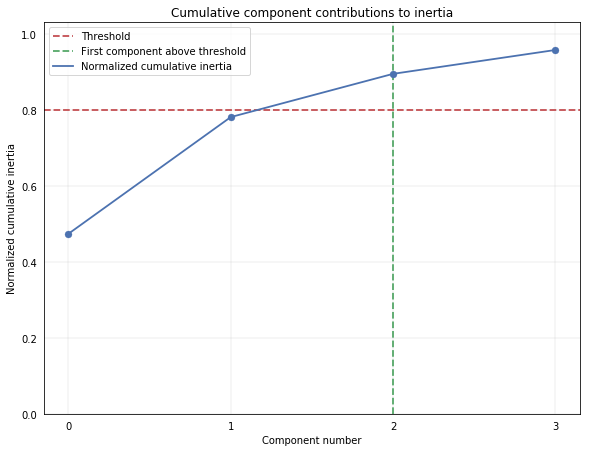

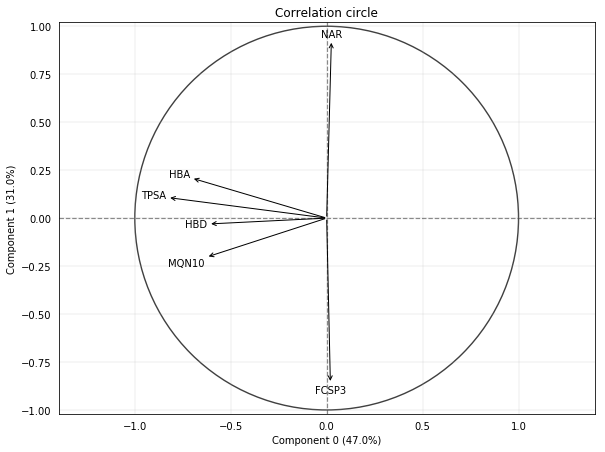

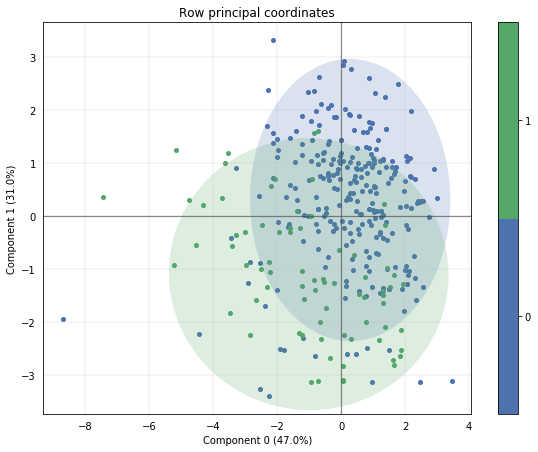

In [59]:
df_PCA_new=df_PCA[['ID', 'natural_product', 'TPSA', 'HBA', 'HBD', 'FCSP3', 'MQN10', 'NAR']]
df_PCA2 = df_PCA_new.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)

plt.show()

### Can we separate methods of administration

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
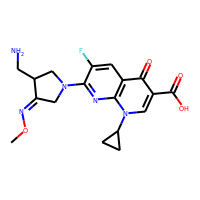
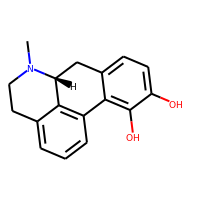
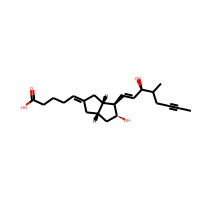
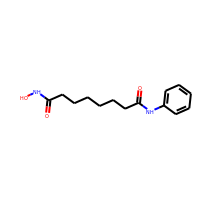
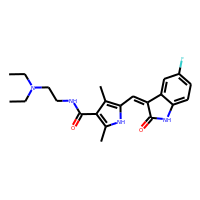

In [61]:
df_meds.head()

In [62]:
Ladm=[]
for a,b in df_meds[['oral', 'parenteral', 'topical']].iterrows():
    oral = b[0]
    parenteral = b[1]
    topical = b[2]
    if oral == 'True' and parenteral == 'False' and topical == 'False' :
        Ladm.append('O')
    elif parenteral == 'True' and oral == 'False' and topical == 'False' :
        Ladm.append('P')
    elif topical == 'True' and parenteral == 'False' and oral == 'False':
        Ladm.append('T')
    else :
        Ladm.append('M')


len(Ladm)

409

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
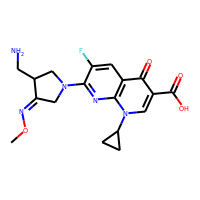
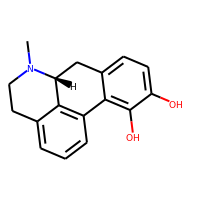
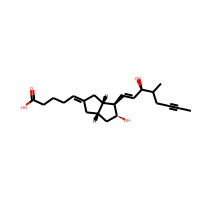
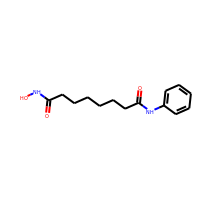
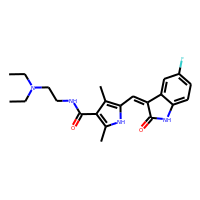

In [64]:
df_meds['Administration'] = Ladm
df_meds = df_meds[df_meds['Administration'] != 'M']

df_meds.head()

In [65]:
df_PCA = df_meds[['ROMol', 'Administration']]
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
# df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
# df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
# df_PCA['ES'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi1(m))
# df_PCA['FP'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa1(m))
# df_PCA['FP1'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa2(m))
# df_PCA['FP2'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa3(m))

df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
len(df_PCA)

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

382

/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/colin/Programmes/anaconda3/envs/gson_py35/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/colin/Programmes/anaconda3/envs/gson_p

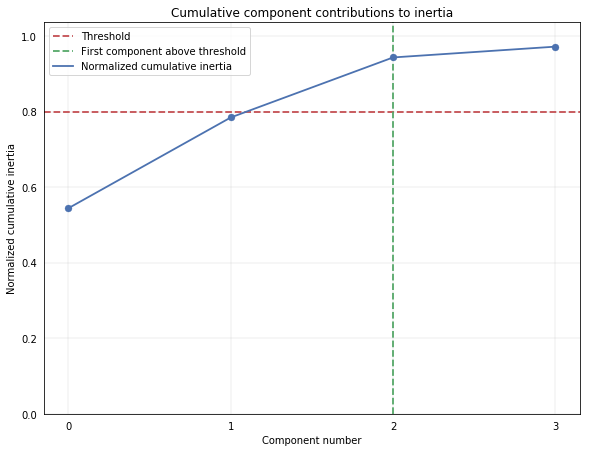

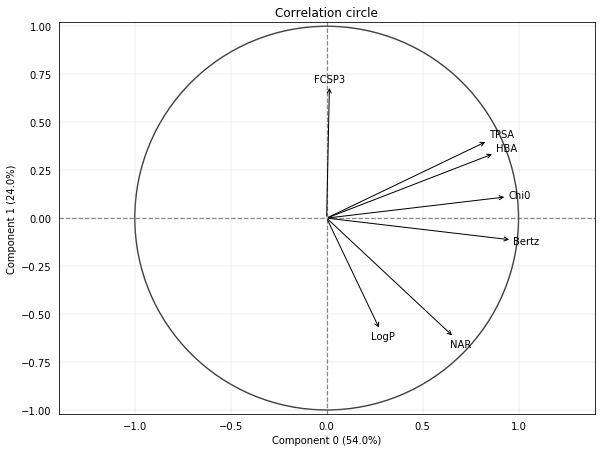

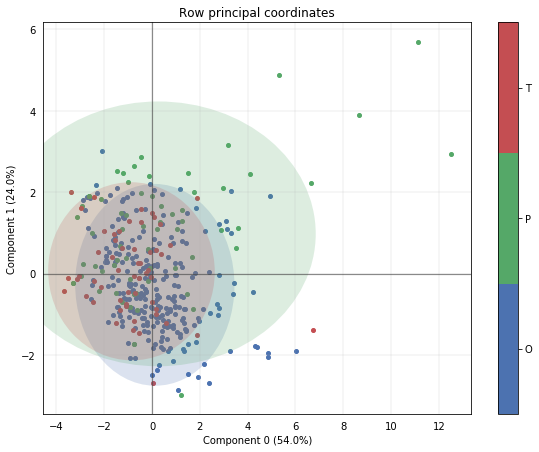

In [70]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=df_PCA.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='Administration', ellipse_fill=True)

plt.show()

### Autre dataset

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
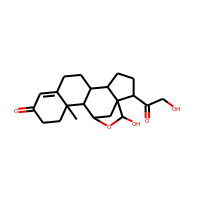
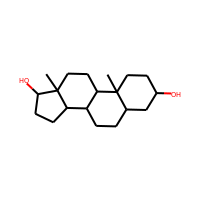
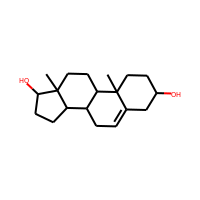
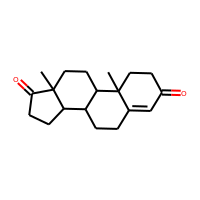
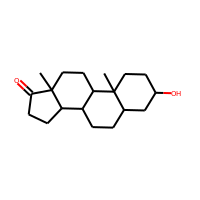

In [71]:
#Charger le dataset mix.sdf 
df_mix = PandasTools.LoadSDF('/home/colin/Bureau/GSON/data/mix.sdf', 
                             isomericSmiles=True)
df_mix.head()

In [72]:
df_mix['cat'].value_counts()

TH    72
Fr    50
BZ    37
ST    31
Name: cat, dtype: int64

### Examen?

ROMol                NaN cat
0  <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAVN0lEQVR4nO3deVBTV/sH8OcmCGFRBIpA0FJ3REQYim2ltbXii1aqVmtRHESLlRdhsLgM1HEIVKVqRfODumGlYnF5lY4al7GF1mpbF4S61aVYRZTNBS2LgQRyz++P4+TNK0JJ7j0EnOczHcYmuScP8OUu555zwhFCACGxScxdAHoxYbAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGi6Hq6urbt2+vXr361q1b5q6lo3GEEHPX0HE0Gk1NTU2vXr064L10Ot2YMWNKS0tv374NAF5eXtOmTZsxY8bgwYM74N3N7kULlkajqa6urqysrKioaPn13r17gwYNCg0NTUxMlMlkTCtJTk5OSUlxcHAYPXp0fn5+bW0tfdzPz+/DDz+cNm3awIEDmRZgZqQra2xsXLJkSXh4+JgxY7y8vHr27Nn2N9utW7fu3bsDQFxcHNPCTpw4IZVKJRJJXl4erVOlUoWHh9vb2+uL8fLyUigUV69eZVqJuXThPVZFRUVUVNSxY8eam5v1D1paWjo5Ocnlcjc3N8OvDg4Ocrncw8Pj4sWLb7zxRlNTk0qlCgkJYVHYo0eP/Pz87ty5k5SUlJKSYviURqP55ZdfDh06tHv37gcPHtAH6VEyNDR0yJAhLOoxD3Mn23SJiYkA4Ofnt3379mPHjl2+fPnBgwft2XDNmjUA4OzsXFlZKXpVPM9PnDgRAN56662mpqbWXqbRaA4fPhwREWG4lx02bNjKlStFL8ksumqw6uvrnZycAOD06dPGbqvT6YKCggAgODiY53lxC0tLSwMABweH27dvt+f1zc3Nv/zyS1xcHL2k8PT0PH78uLglmUVXDdb69esBYNSoUaZtXlVV5eLiAgBKpVLEqgoLCy0tLTmOO3DggLHbarXapKQkAJg0aZKIJZlLlwxWc3Nzv379AODgwYMmN3LkyBGO46ysrM6fPy9KVXV1dYMGDQKABQsWmNbC/v37AWDy5Mmi1GNeXTJYe/bsAYBBgwbpdDoh7URHRwOAl5fXkydPhFc1c+ZMAPDx8WloaDCthe+++w4ApkyZIrwYs+uSwXrttdcAYPPmzQLbaWhoGDZsGADMnz9fYFNff/01ANjZ2V2/ft3kRnJzcwFg6tSpAovpDLpesH7++Wd6TadWq4W3dvnyZWtrawAw4axI78qVKzY2NgCwY8cOIcXs3bsXAKZNmyakkU6i690rpJddMTExNBACeXt7p6amAsDcuXMrKipMaKGxsTEsLEytVs+ePTs8PFxIMYQQAOA4TkgjnYW5k22c69evSyQSmUxWVVUlVps8z9Oe0rffftuEk7ZPPvkEAAYOHFhbWyuwkt27dwPA9OnTBbbTGViYOddGSktL43l+zpw5tLNAFBzHbdu2bfjw4SdOnEhLS1uyZMkzL2hoaGjt5mNZWZmFhUW3bt327dtHbxYJQV6gPVZXCtb9+/dzcnI4jouLixO35V69em3fvn38+PFLly4tKSmxsLCoqKioqqoqLy+vqqpqbGxsY1tra2udTldXVye8DJ7nAUAi6XrnJy11pWBt2LChoaFh8uTJnp6eojceHBw8ceLE3377bdOmTc88JZPJWt581N+C3LBhQ2pq6owZMy5evOjo6CikBtxjmYFard64cSMALFq0iNFbPHjw4OHDh0FBQSEhIa6uru7u7q6urnK5nF7xtSYlJeX48eOnT5+Oiorat2+fkAJepD1Wlzl5z8jIAICAgABG7RcUFACAg4NDXV2dsdvevHmzR48eAPDNN98IqeGbb74BgIiICCGNdBKdaI+l1WofPnxoeGr8+PFj/f+WlpZyHDd//nxG706HPERHR9vZ2Rm7bb9+/TIyMiIiImJjY0eOHElv7JiAEAIvyh7LbMHatm3bzZs39efI9+7d049Pei6O4wghR44cmT17tujFlJSU7N+/38rKKjY21rQWZs2a9f333+/atSssLOzUqVOWlpYmNPIiHQrNECye56Ojo/Py8kpKSp55ysHB4bnnyHK5nOd5f3//3NzcrKysjz/+WNyS1q1bp9PpIiIi3NzcTG5k48aNp0+fLioqSk5Opp2uxiIv0Mm7Gc6x6K1WJyen5OTkrKysI0eOXLhwobKy0nBolFarvXv37pkzZw4ePKhSqeiD3377LQDY2toKuR/XUnV1tZ2dHcdxFy9eFNjU2bNnu3XrJpFIfvzxRxM2X7FiBQDMnj1bYBmdgRmCNXLkSADIyMgghDQ3N+/fvz8jI2PZsmWzZ89+7733fHx8XFxcDP9qvby89NvSEQT+/v4ajUasepYvXw4A7733niitKRQKAHB3d3/48GE7N/njjz9WrVoVGBjIcVzfvn179Ohx+PBhUYoxo44O1tmzZwHA0dGRXnzxPG9lZdVyPyqVSuVyub+/f0hISHx8vH7zuro6OrklISFBlHoaGxvp4c+0fUxLOp3unXfeAYAPPvig7Zf9+uuvixYtogPLqJ49e9LvjuO4xYsXa7VaUUoyi44O1pQpUwBg2bJl+kc+/vjj6OjolJSUrVu3Hjp0qKioqKKioo17dgUFBfRwk5+fL7weOtzFx8dHxDHKd+7coT2lmZmZzzylH4gsl8v1eXrppZfCw8NVKpVGo+F5XqlU0nP/V1999caNG6KU1Mboe0Y6NFi3bt2SSqVWVlYVFRVC2qFTX9zd3ds5e6I1PM8PHToUAHJycoS00xLtKbWxsbl27RohRK1Wq1SqefPmOTs76/Pk4eERFxeXl5fX8rdeUFDQv39/AOjRo8euXbtMLkOn0+Xl5YWEhMyYMSMwMFCssbLt0aHBiomJAYDIyEiB7eh0utGjR4PgUbyHDx8GgN69e7M46ERERND0vP/++4Z998OGDUtKSvrH33FNTc306dPpJuHh4fX19Ua9e21tbXp6+oABA2gLdIiRTCbbuHGjgO/JCB0XrOrqaltbW47j/vjjD+Gt3b17lx5uhIwjpelcu3at8Hpaqq2tdXZ2dnBw0F+CKBQKugNrv+zsbBrKIUOGtPOitaSkJCEhQX/Xsm/fvqtWraqsrNTfuZ88eXJ1dbVJ35MROi5Yn3/+OQBMmDBBrAbpQF6ZTHbp0iUTNi8sLKTHmr///luskgzV1NTQWfy9e/cuLy83uZ0rV67Q8dMymaztOUWFhYXh4eEWFk/7JgMDA/fu3Wt4nN27dy+div3KK69cPHPG5JLao4OC1djY6OrqCgA//fSTiM3OmTMHALy9vU2YvzBjxgwAWLJkiYj1GKL3iCQSiUQiEXhOqVar9fubKVOmPHr0yPBZjUazd+/eN954g77A0tJy2rRpZ1rJTWlp6ciRIz2dnJrd3YlCQYTNRmlDBwVr69atADB8+HBxm62vr6eLtxh2SRiqqam5evXq8ePHv/3227Vr18bHx4eFhY0aNWrw4MG2trZSqfTOnTvilkRptdqXX34ZAMSa90EI2bdvH5027eHhcerUKULI48ePlUplnz59aKR69eqVkJBw9+7df6ytbMUKwnEEgPzrX0S8sbiGOiJYPM97eXkBwM6dO0VvXD9HdOHChatXr16w
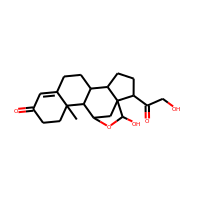
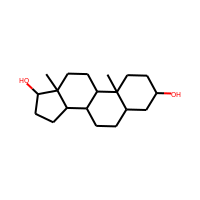
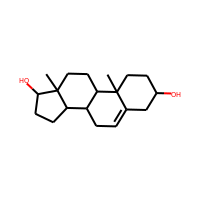
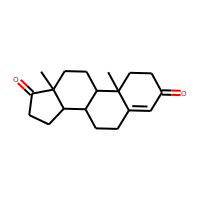
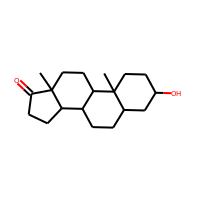

In [921]:
test = PandasTools.LoadSDF('/home/bournez/Bureau/steroids.sdf', idName=None)
test['cat']=['ST' for x in test.ROMol]
for mol in test.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
    mol.SetProp('_Name', '')
test.head()

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
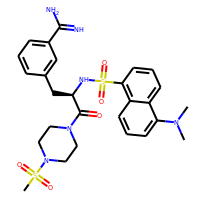
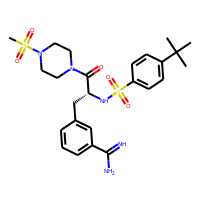
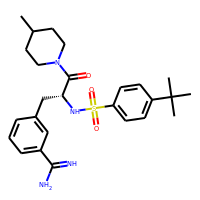
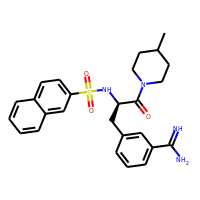
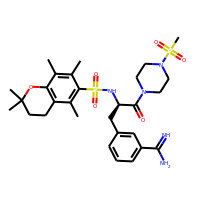

In [922]:
test2= PandasTools.LoadSDF('/home/bournez/Bureau/thrombin.sdf')
for mol in test2.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
test2['cat']=['TH' for x in test2.ROMol]

test2.head()


RDKit WARNING: [15:08:15]  deprecated group abbreviation ignored on line 1604
RDKit WARNING: [15:08:15]  S group SUP ignored on line 1607


ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
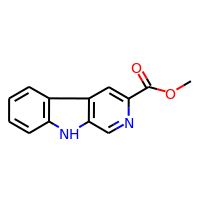
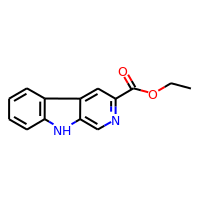
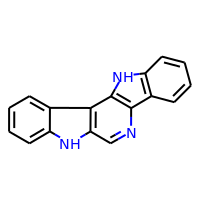
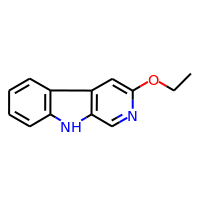
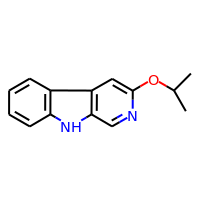

In [923]:
test3 = PandasTools.LoadSDF('/home/bournez/Bureau/benzo.sdf')
test3['cat']=['BZ' for x in test3.ROMol]
test3.head()

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
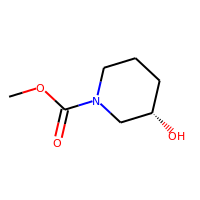
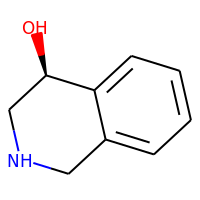
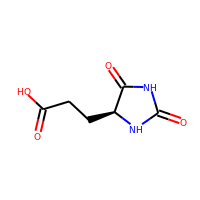
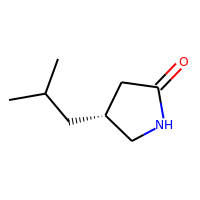
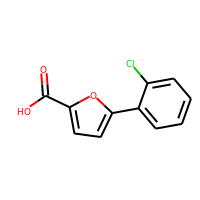

In [924]:
test4 = PandasTools.LoadSDF('/home/bournez/Téléchargements/chbrbb-interesting.sdf')
test4=test4.sample(50)
test4['cat']=['Fr' for x in test4.ROMol]
test4.head()

In [925]:
alls=pd.concat([test[['ROMol', 'cat']], test2[['ROMol', 'cat']], test3[['ROMol', 'cat']], test4[['ROMol', 'cat']]], ignore_index=True)
len(alls)

190

In [787]:
test.EXACT_MASS = test.EXACT_MASS.astype(float)
test = test[test.EXACT_MASS.between(200, 700)]
len(test)

2337

ALOGPS_LOGP ALOGPS_LOGS ALOGPS_SOLUBILITY        CAS DATABASE_ID DATABASE_NAME  EXACT_MASS   FORMULA ID                                                                          INCHI_IDENTIFIER                    INCHI_KEY JCHEM_ACCEPTOR_COUNT JCHEM_ATOM_COUNT JCHEM_AVERAGE_POLARIZABILITY JCHEM_BIOAVAILABILITY JCHEM_DONOR_COUNT JCHEM_FORMAL_CHARGE JCHEM_GHOSE_FILTER                                                                         JCHEM_IUPAC            JCHEM_LOGP JCHEM_MDDR_LIKE_RULE JCHEM_NUMBER_OF_RINGS JCHEM_PHYSIOLOGICAL_CHARGE JCHEM_PKA JCHEM_PKA_STRONGEST_ACIDIC JCHEM_PKA_STRONGEST_BASIC JCHEM_POLAR_SURFACE_AREA JCHEM_REFRACTIVITY JCHEM_ROTATABLE_BOND_COUNT JCHEM_RULE_OF_FIVE JCHEM_TRADITIONAL_IUPAC JCHEM_VEBER_RULE MOLECULAR_WEIGHT                  NAME                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
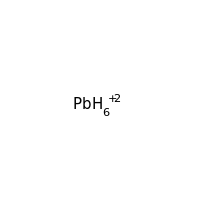
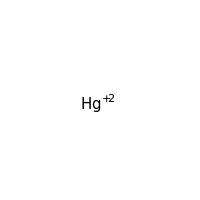
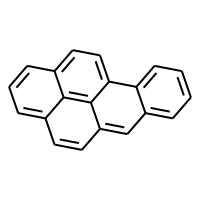
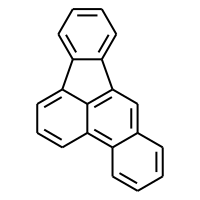
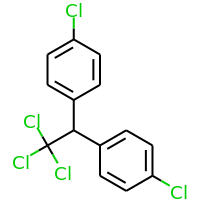

In [788]:
test['Toxin'] = ['1' for x in test['EXACT_MASS']]
test.head()

ID natural_product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
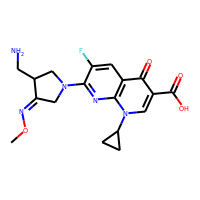
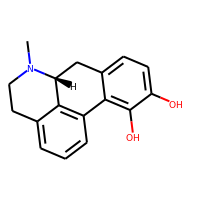
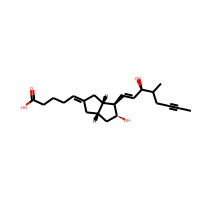
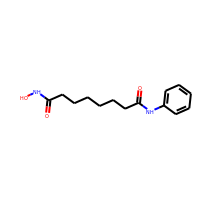
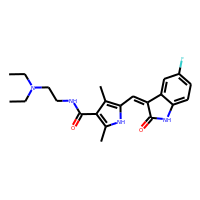

In [789]:
df_PCA['Toxin'] = ['0' for x in df_PCA['ID']]
df_PCA.head()

In [926]:
# df_PCA_t = df_PCA[['ROMol', 'Toxin']]
# test_t = test[['ROMol', 'Toxin']].sample(300)

#alls = pd.concat([test_t, df_PCA_t])
#alls = df_PCA

alls['MW'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
alls['LogP'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
alls['TPSA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
alls['LabuteASA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
alls['HBA'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
alls['HBD'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
alls['FCSP3'] = alls.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
alls['MQN8'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
alls['MQN10'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
alls['NAR'] = alls.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
alls['NRB'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
alls['Chi'] = alls.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))

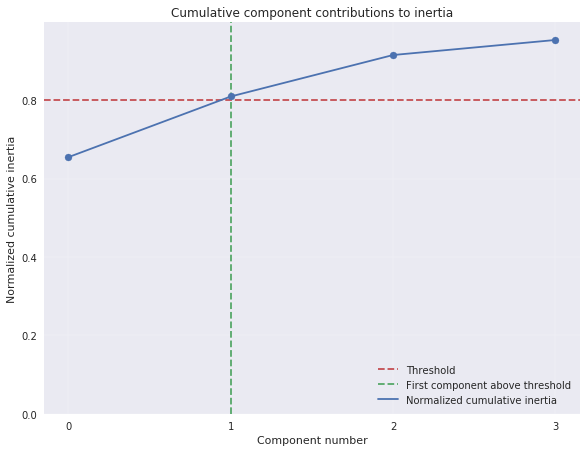

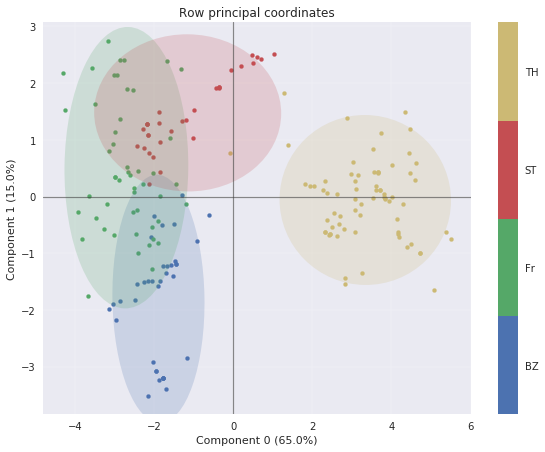

In [927]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=alls.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='cat', ellipse_fill=True)
#fig3, ax3 = pca1.plot_rows(axes=[1,2], color_by='Administration', ellipse_fill=True)

plt.show()

In [928]:
PandasTools.WriteSDF(alls, '/home/bournez/Bureau/exam.sdf', properties=['cat'])

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
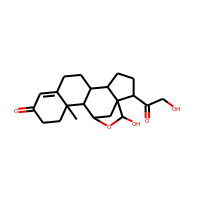
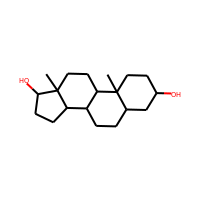
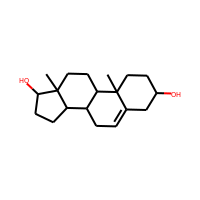
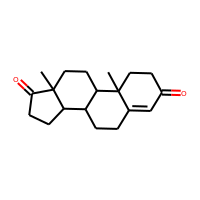
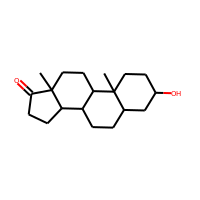
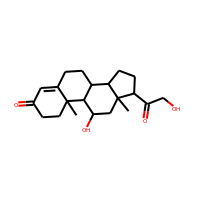
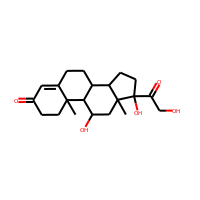
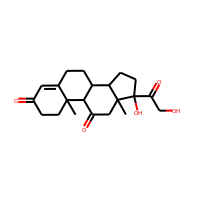
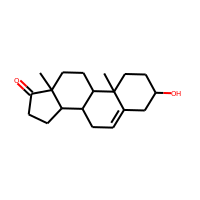
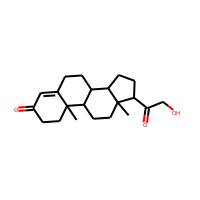
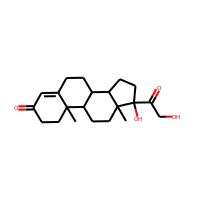
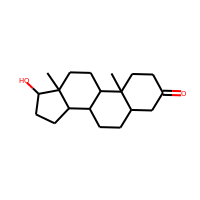
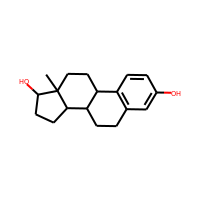
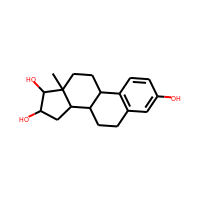
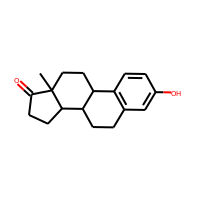
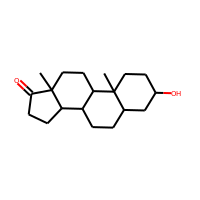
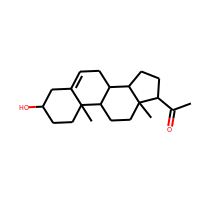
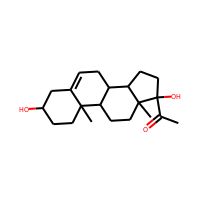
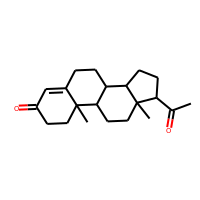
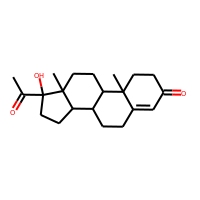
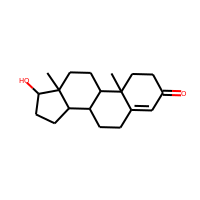
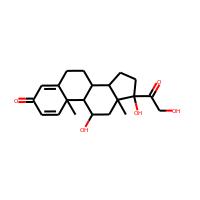
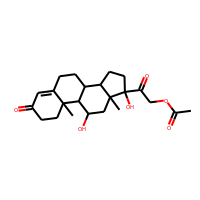
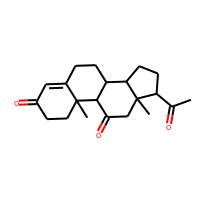
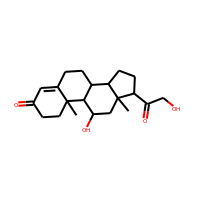
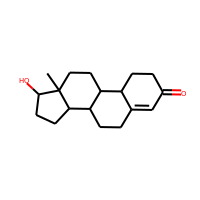
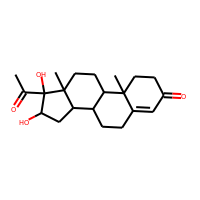
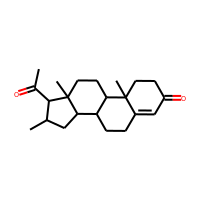
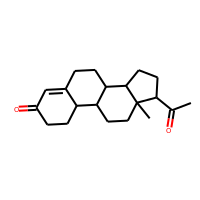
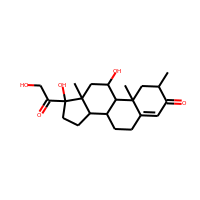
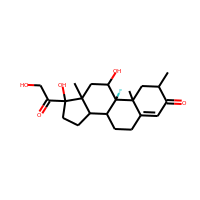
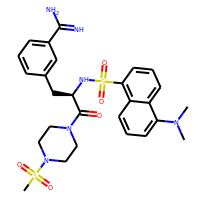
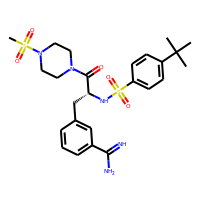
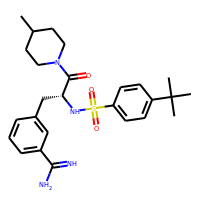
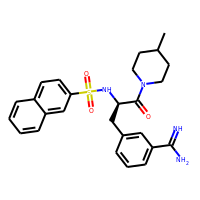
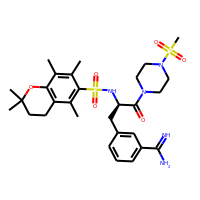
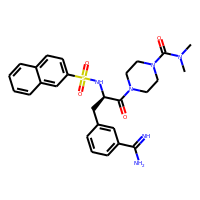
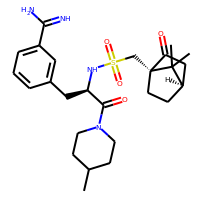
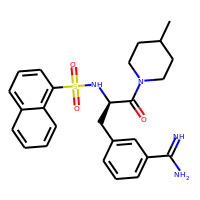
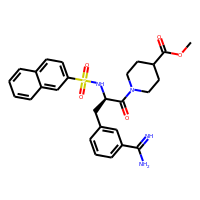
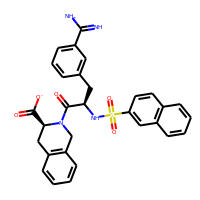
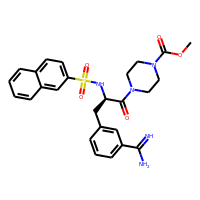
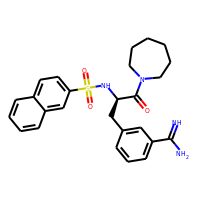
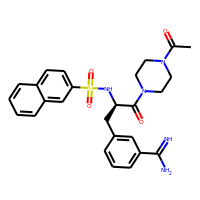
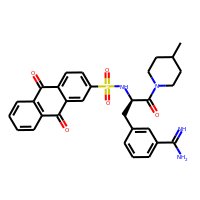
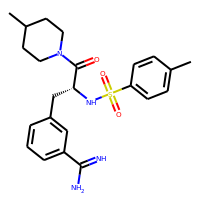
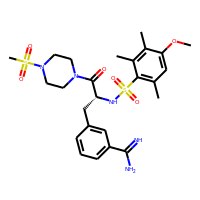
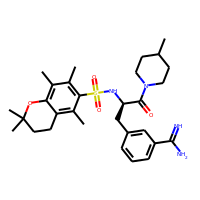
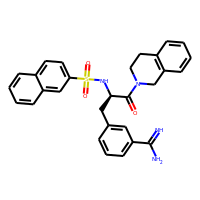
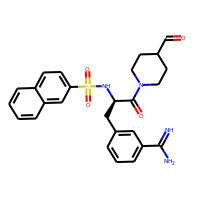
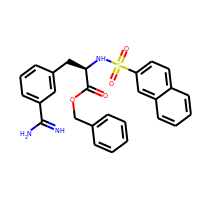
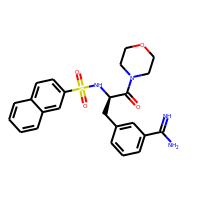
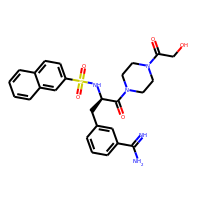
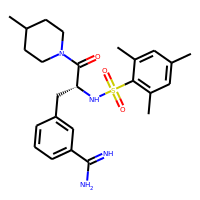
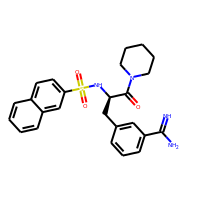
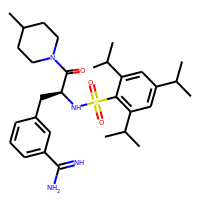
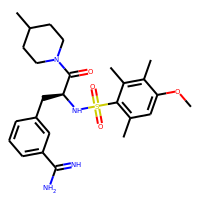
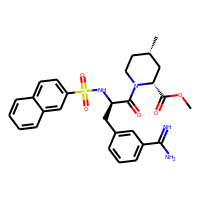
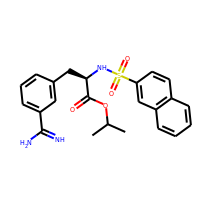
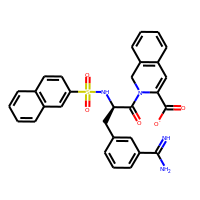
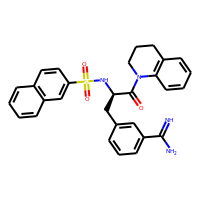
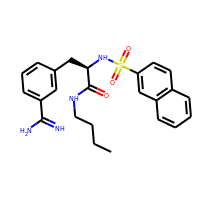
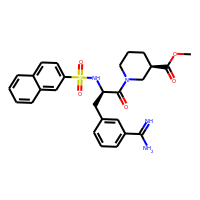
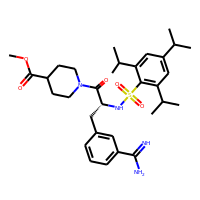
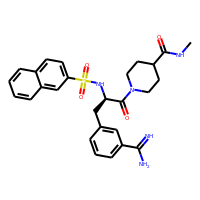
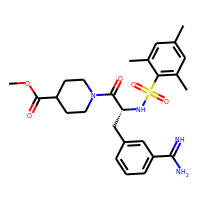
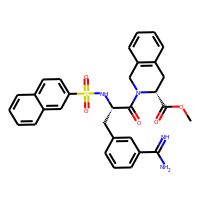
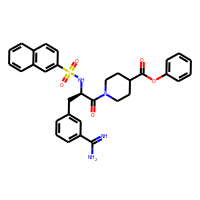
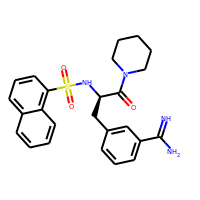
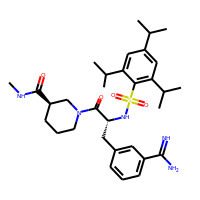
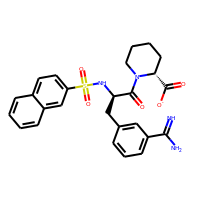
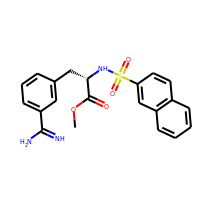
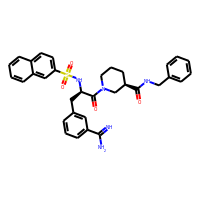
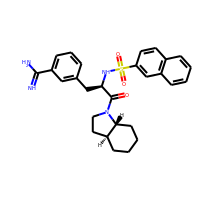
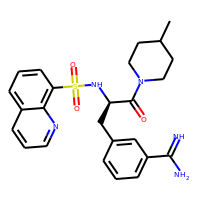
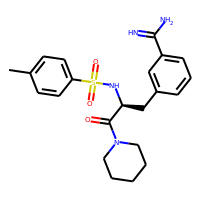
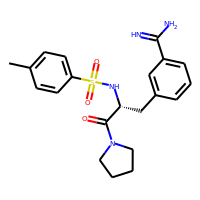
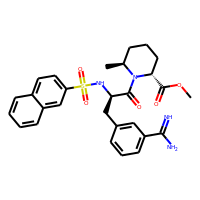
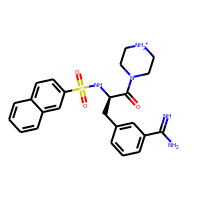
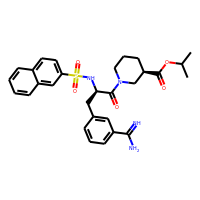
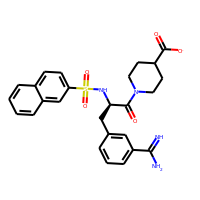
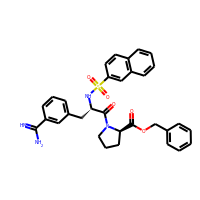
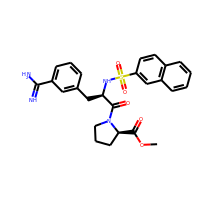
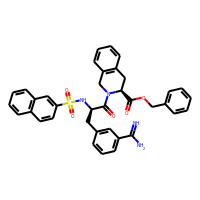
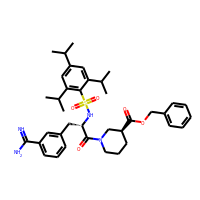
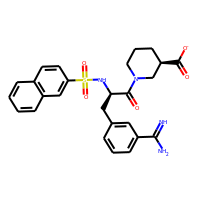
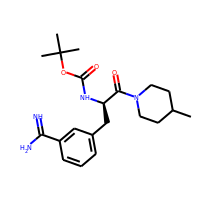
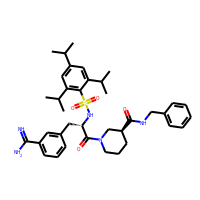
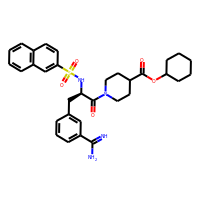
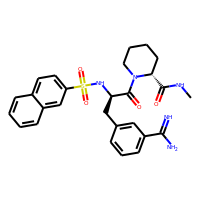
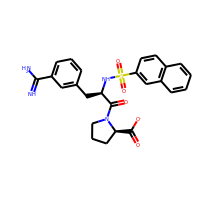
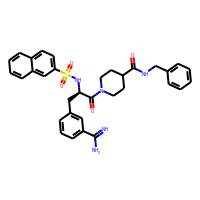
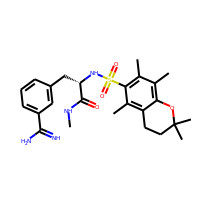
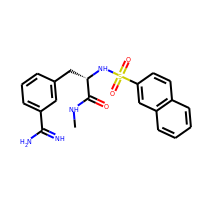
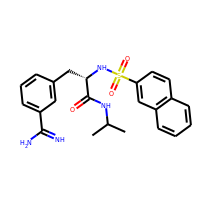
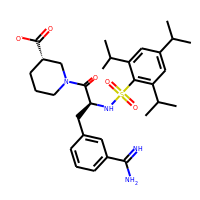
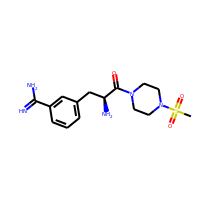
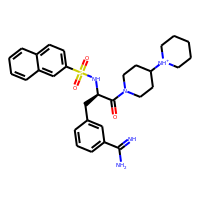
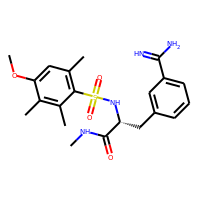
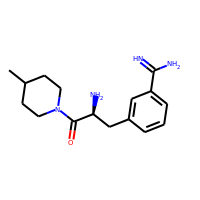
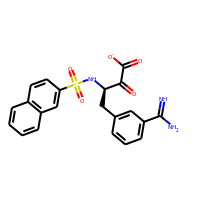
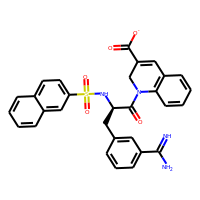
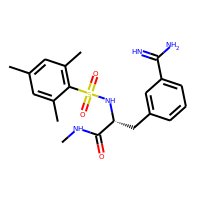
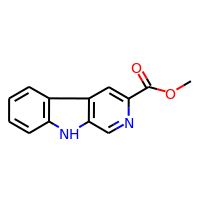
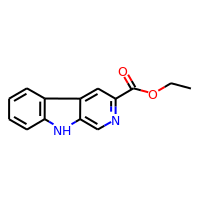
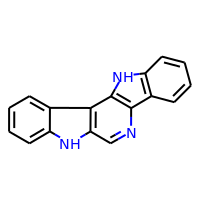
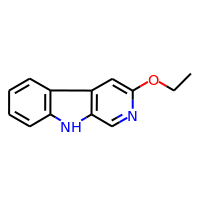
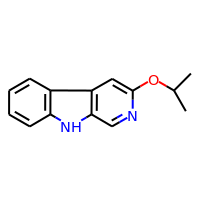
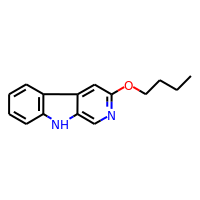
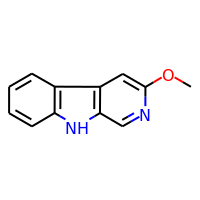
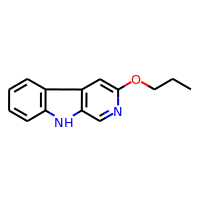
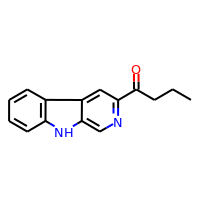
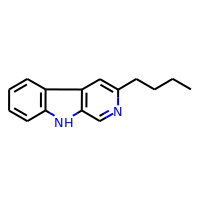
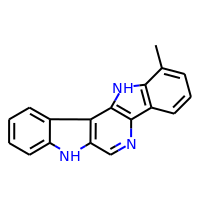
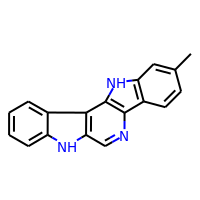
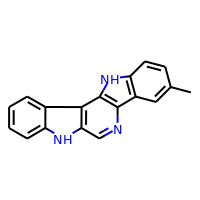
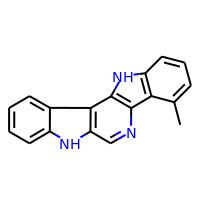
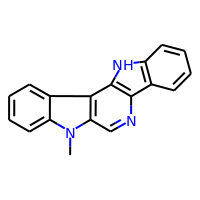
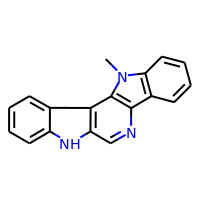
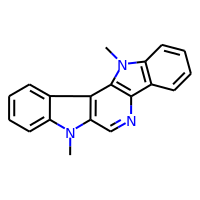
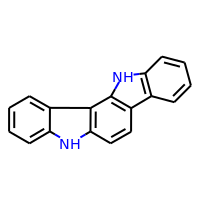
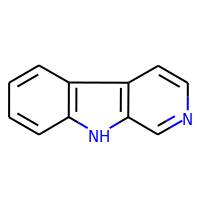
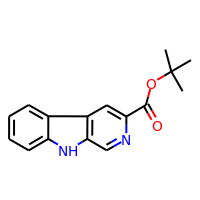
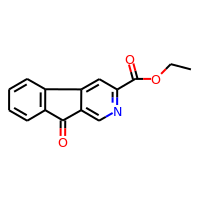
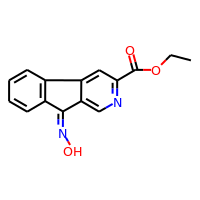
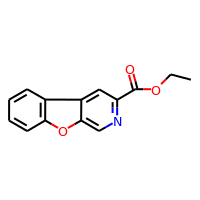
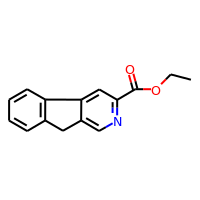
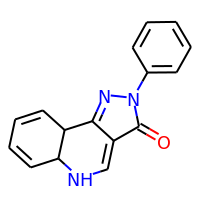
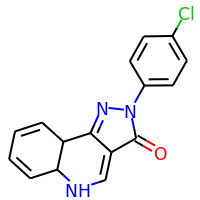
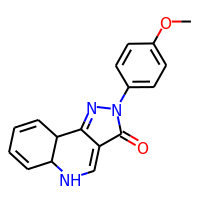
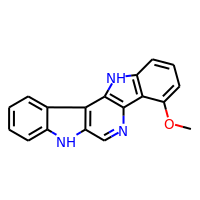
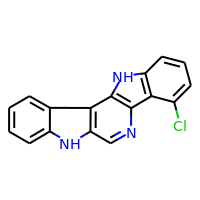
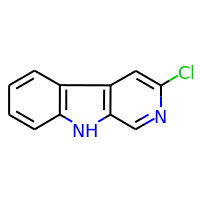
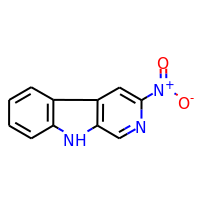
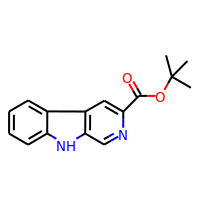
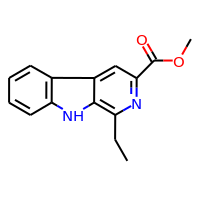
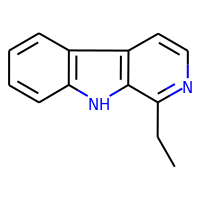
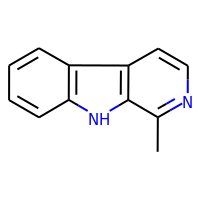
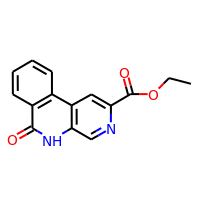
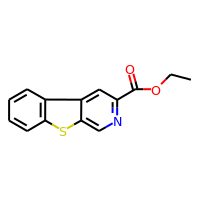
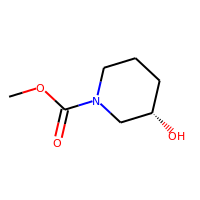
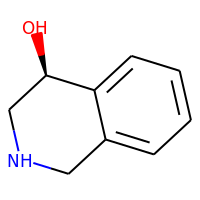
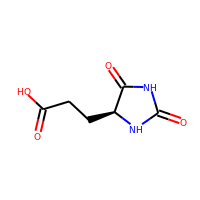
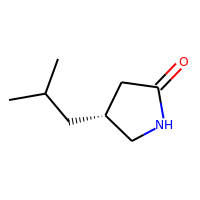
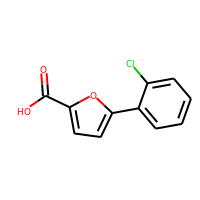
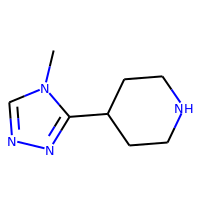
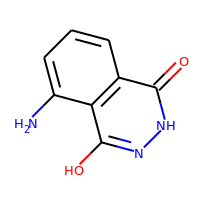
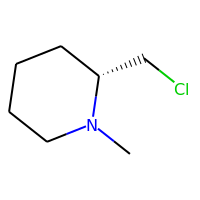
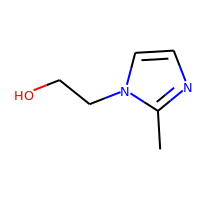
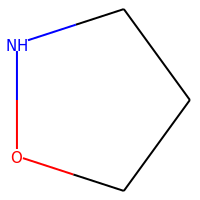
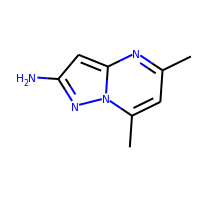
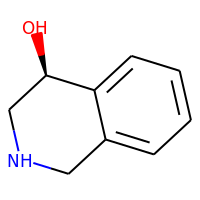
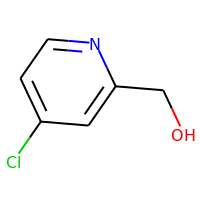
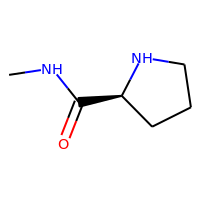
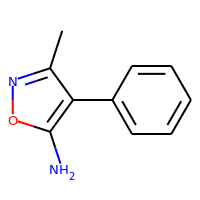
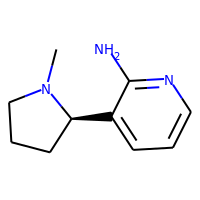
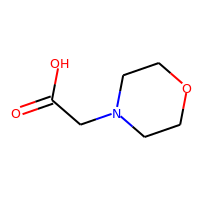
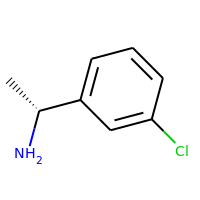
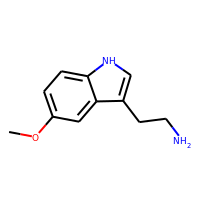
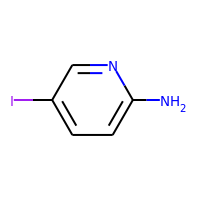
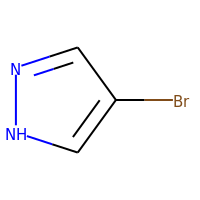
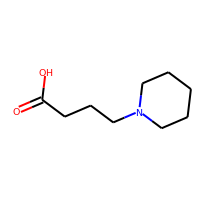
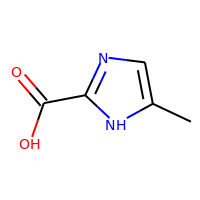
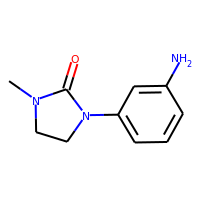
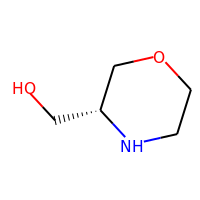
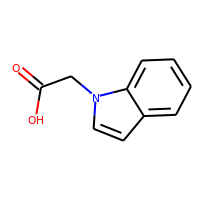
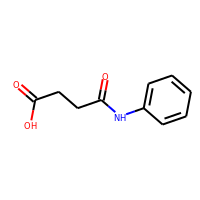
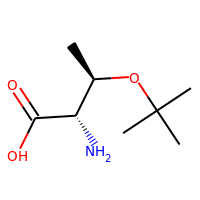
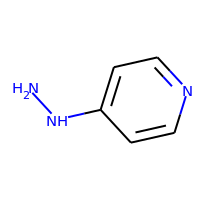
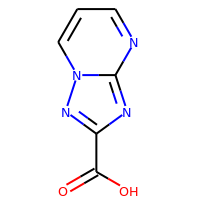
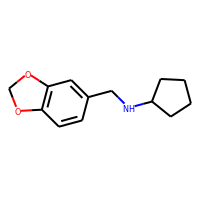
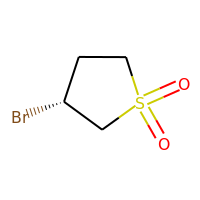
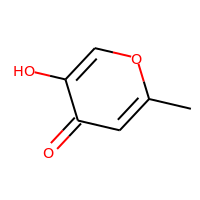
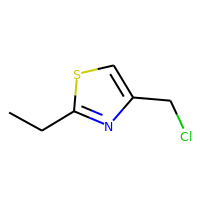
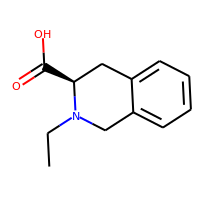
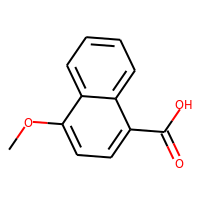
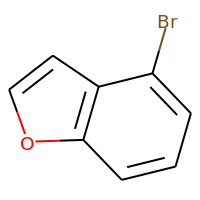
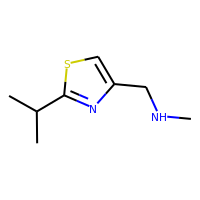
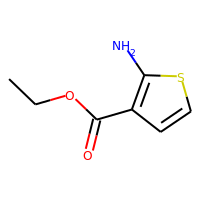
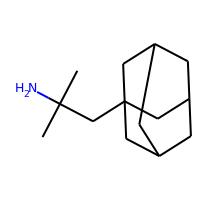
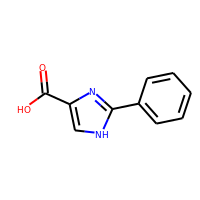
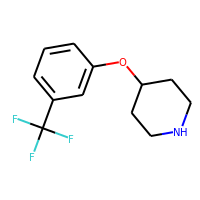
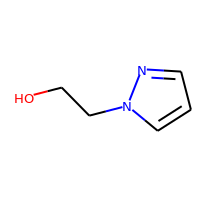
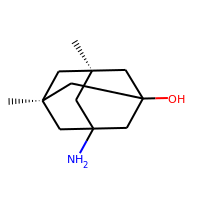
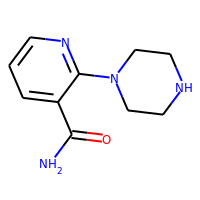
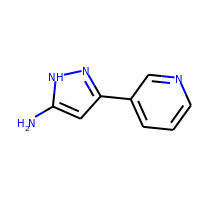
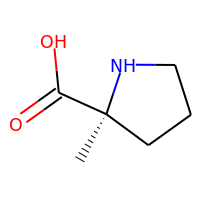
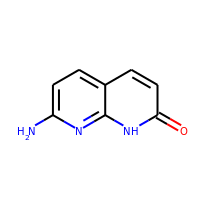
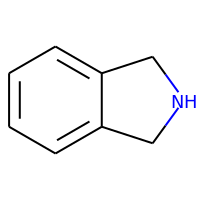
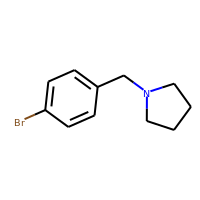

In [929]:
PandasTools.LoadSDF('/home/bournez/Bureau/exam.sdf')

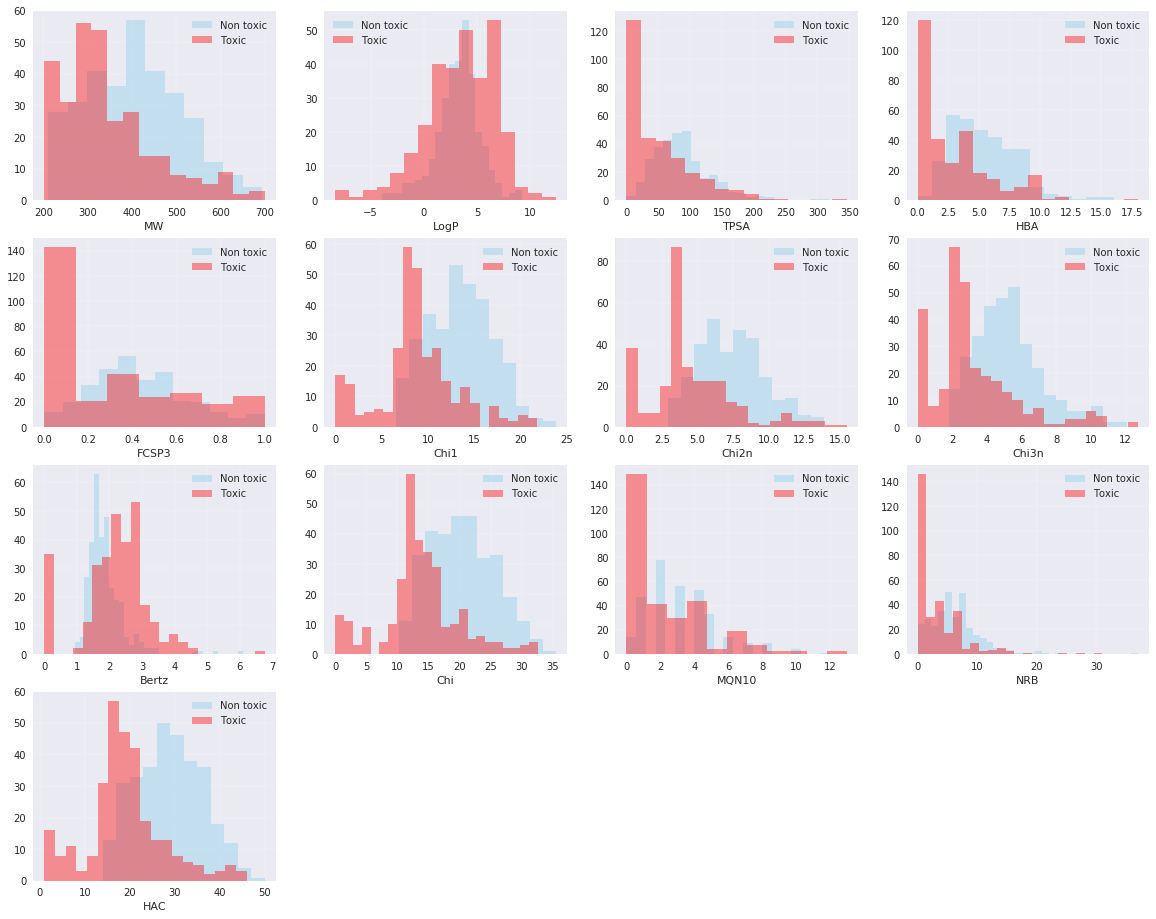

In [817]:
#Pour regarder tous les descripteurs :
plt.figure(figsize=(20, 16))

j=1
for i in alls.iloc[:, 2:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(alls[alls['Toxin'] == '0'][i] , color="skyblue", label="Non toxic", kde=False)
    sns.distplot(alls[alls['Toxin'] == '1'][i] , color="red", label="Toxic", kde=False)
    plt.legend()
    j += 1

### With Scikit-Learn

In [95]:
# split data table into data X and class labels y
X = df_PCA.iloc[:, 3:].values
y = df_PCA.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Reduced dataset shape: (316, 4)


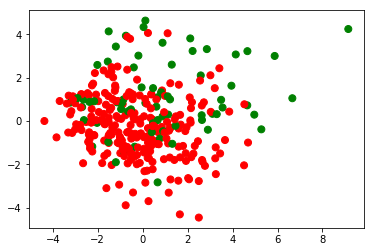

In [96]:
def color(x):
    if x == '0' :
        return('red')
    else :
        return'green'

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_std)
X_reduced = pca.transform(X_std)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[color(x) for x in df_PCA.natural_product],
           cmap='RdYlBu')



In [97]:
#Contribution dezs variables
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.7860517 , -0.53624887,  0.13012575, -0.0038435 ],
       [-0.10649052, -0.91287579,  0.16991071,  0.20171548],
       [ 0.86397933,  0.41282455, -0.15736456, -0.10234005],
       [ 0.75169586, -0.58361053,  0.14247513,  0.03475038],
       [ 0.82698135,  0.14223902, -0.04531822, -0.35597808],
       [ 0.55402269,  0.54079725, -0.20368336,  0.3133547 ],
       [-0.00962337,  0.24565472,  0.87296589,  0.14302092],
       [ 0.45156901,  0.21458766, -0.47570683,  0.62622175],
       [ 0.71469608,  0.27853543,  0.37209427, -0.25772407],
       [ 0.28710448, -0.56455336, -0.69175297, -0.18457329],
       [ 0.55277462, -0.2576638 ,  0.45385401,  0.29553052]])

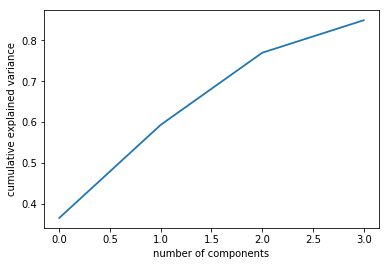

In [98]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [99]:
#Covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0031746   0.4152236   0.43822772  0.9839481   0.55237216  0.14692074
   0.01968319  0.17725951  0.42009483  0.40305544  0.49679409]
 [ 0.4152236   1.0031746  -0.48610068  0.46791565 -0.3211458  -0.48040529
  -0.07194243 -0.21294041 -0.26310838  0.30450715  0.26573426]
 [ 0.43822772 -0.48610068  1.0031746   0.37994871  0.79611367  0.69078243
  -0.04968477  0.49127753  0.70113232  0.13539588  0.24179657]
 [ 0.9839481   0.46791565  0.37994871  1.0031746   0.50699059  0.11511858
   0.03033537  0.16713422  0.37277583  0.41270631  0.51287953]
 [ 0.55237216 -0.3211458   0.79611367  0.50699059  1.0031746   0.3342391
   0.01037005  0.27827551  0.58285976  0.24931153  0.3084842 ]
 [ 0.14692074 -0.48040529  0.69078243  0.11511858  0.3342391   1.0031746
  -0.00215141  0.48557125  0.38340628 -0.02073176  0.11862396]
 [ 0.01968319 -0.07194243 -0.04968477  0.03033537  0.01037005 -0.00215141
   1.0031746  -0.25591816  0.2090692  -0.73437726  0.24860622]
 [ 0.17725951 -0.2129404

In [100]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.39134908 -0.33822733  0.09328713  0.00410247 -0.2974735  -0.10384337
  -0.10168886  0.69739527  0.31244316 -0.11569088  0.12941806]
 [ 0.0530181  -0.57577658  0.12180897 -0.215307    0.01260612 -0.17391879
  -0.20829046  0.01067868 -0.72819515  0.01254146  0.01203389]
 [-0.43014666  0.26038012 -0.11281463  0.10923568 -0.03530429 -0.02523074
  -0.09489789 -0.06440142 -0.27480604 -0.71515363 -0.34715594]
 [-0.37424445 -0.36809967  0.1021404  -0.03709184 -0.29429118 -0.09887549
  -0.05794146 -0.71011562  0.3178811  -0.00538486  0.08690692]
 [-0.41172659  0.08971417 -0.03248862  0.37996375 -0.14486262  0.46512469
   0.23599383 -0.00365573 -0.38869511  0.2531413   0.41086203]
 [-0.27582953  0.34109612 -0.14602057 -0.33446842 -0.0673999  -0.66503226
   0.34769299  0.01480578 -0.14998547  0.19490838  0.21441822]
 [ 0.00479115  0.15494138  0.62582912 -0.15265762 -0.4173274   0.12539808
   0.28621641  0.04247158 -0.0957863   0.18284044 -0.49476017]
 [-0.22482124  0.13534651 -

In [101]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.021583255438755
2.5057564543713027
1.9395746206001556
0.8749548620178792
0.5754809762296043
0.4789862158408267
0.33178787479794175
0.11249853761683062
0.08948346581810696
0.053837312643256766
0.0160564246253531


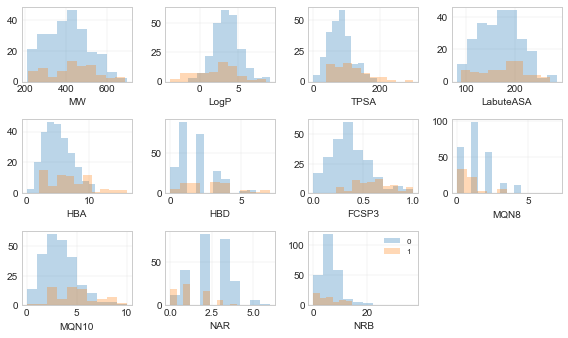

In [102]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: '0',
              2: '1'}

feature_dict = {0: 'MW',
                1: 'LogP',
                2: 'TPSA',
                3: 'LabuteASA',
                4: 'HBA',
                5 : 'HBD', 
                6: 'FCSP3',
                7:'MQN8',
                8:'MQN10', 
                9:'NAR',
                10:'NRB'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(11):
        plt.subplot(4, 4, cnt+1)
        for lab in ('0', '1'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()